## Appliyng Logestical Regression on a random made class Dataset.

Authot : ALIMOUSSA Mohamed



The Data used in this exercice is generated randomly(there is no model or pattern descriping the data) which means that there is no relation between a students informations and it's label, for instant a student comming from casablanca and does have a age of X etc, doesn't neccesery have to get a grade(label).

Using a ML model applying on this data is useless it's equivalent on using a random function that would each time choose randomly a label from 1 -> 4 for each student in test phase. ( Mathematicly the accurcy of the random function would be 25%)

In this exercice we will try to prove that applying a ML model on a random data is not the best option.

to do that, we will calculate the corelations between the variables. If there is no correlation between the variables and the label (that's mean that there is no model that guide our data) so on we can't apply a ML model on it.
So : 

RANDOM DATA ---1---> NO CORRELATIONS BETWEEN VARIABLES AND LABEL ---2---> NO MODEL IN DATA ---3---> ML DOESNT WORK.
               
               
In the rest of this blog we will :
- First :  test the implication 1 
- Seconde : prove that no corelations between variables and label means that applying a ML won't work.

TO DO THAT, let's first load our DATA.
you can find it here : <a href="http://www.sharecsv.com/s/3ef6d2b83be59b69f683f65e5b995f13/data.csv"> here </a>
Then split it to variables and labels.

## 1- LOAD DATA :
    
    we need to upload the data from a cvs file to a list, in this code i tried to write a function named get_data() in a file named d.py, the code of the function is as following :

In [32]:
def get_data():
	with open('data.csv', 'rb') as csvfile:
		spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
		my_list = []
		an_element = []
		i=0

		for row in spamreader:
		    if(i==1):
		        an_element.append(float(row[0]))
		        an_element.append(float(row[1]))
		        an_element.append(float(string_to_number(row[2])))
		        an_element.append(float(row[3]))
		        an_element.append(float(string_to_number(row[4])))
		        an_element.append(float(row[5]))
		        my_list.append(an_element)
			
		        an_element = []
		    i=1
		return my_list

    this function returns a list (my_list) whish is a list of lists, each element of this list will containt a list containing the informations of a student. ( example : [[23,4,3,2,2,3], [22,4,2,1,2,1] ... ]. Note that the function is using an other function named string_to_list that i have defined urlier that associate for each string a number, for example if it takes as an argument 'rabat' it will automatcly return a 1, if 'casablanca' 2, for 'male' 1 and 'female' 2 etc.
    In this phase we could load the data from a csv file to alist of lists, but still we dodn't split the label y whish is the last column of an students information from the other column whish represente the other informations.

# I- TESTING CORELATION :

In this section we will test and see and corelation between our features and labels.

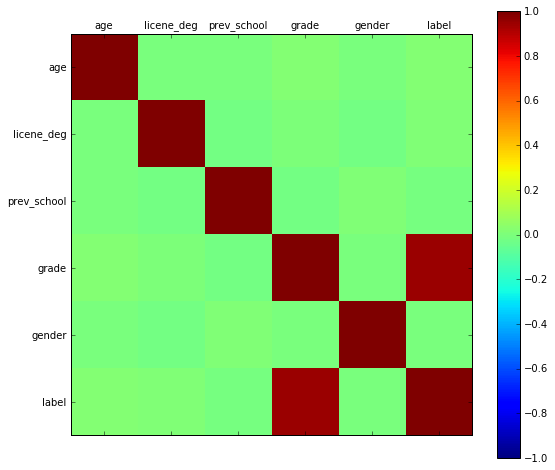

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from d import get_data
from d import string_to_number
import pandas as pd

da = get_data()

df = pd.DataFrame(da)

names = ['age','licene_deg','prev_school','grade','gender','label']
correlations = df.corr()
# plot correlation matrix
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

As expected, since we have a radnom generated data they won't be any correlation between the variables.
There is no correlation between the features and the label.

# II - no crrelation, is ML gonna work ?

Normaly, __for a data that have a pattern, even if we train the data in a random way each time, in the testing phase we will be playing close to a certain accuracy.__

For our data, we will do the training n_train time, we will have then n_train model, we will then calculate the accuracy for each model. if we found that the accuracies are diffrente from each other (big variance) we will be able to prove that we can't apply a ML model on a random generated data.

## 1- SPLITING DATA :

    here we will continue on the work that we did in the data loading and we will split our data, that as we say is a list of lists. to do that we will create 2 lists : x_train and y_train, in this way it is easier to split the data, for each element we will store the first 5 columns that represente the students informations in x_train list and the last column (label column) in the other list : y_list.
    just before storing the label into the y_tain list, and science we are in the multiclass classification and not in a regression probléme, we should transform the label into a vector of 0s an 1 (for 1 : [1,0,0,0], for 2 : [0,1,0,0] etc). this transformation is needed to make it easier in the testing phase to predect the class(label) of a student.(we will use this procedure twis, first for the 6000 first element of train and seconde for the 4000 that remains for test)
    At the end of this phase we will have 2 lists, one contains the values of students infromations and the other one contains the associated labels.whish we will use to train a model.
    

In [34]:
import csv
import time
from d import string_to_number
import tensorflow as tf
from d import get_data
import numpy as np

#let's take 60% of data to training and the rest to test

print(len(get_data()))

#importing data
a = [[]]
a = get_data()


#spliting data

x_train = []
x_test = []

y_train =[]
y_test = []

for i in range(0,int(len(a)*0.6)):
    x_train.append(a[i][0:5])
    
    y_train.append([0,0,0,0])
    y_train[i][int(a[i][5]-1)] = 1
    
for i in range(int(len(a)*0.6),int(len(a))):
    x_test.append(a[i][0:5])
    
    y_test.append([0,0,0,0])
    y_test[i-6000][int(a[i][5]-1)] = 1

10000


## 3- TRAIN PHASE :

In this phase we will split our training data of 6000 into a number : batch_size_tr of batches, because usually when we work with data that have more then 1000 lignes of data we try to split it to a certain number of batches and try to evaluate and minimaze our lose function for each batch.
Suppose we choose a batch_tr_size that eaquales to 1000 then we will have 6 then batches each contains 1000 student.  
    
### Now, how to tell that our data is descriped with a certain model or pattern ?
         
Normaly, __for a data that have a pattern, even if we train the data in a random way each time, in the testing phase we will be playing close to a certain accuracy.__
So we will repeat the training n_train time, each time we will pick the data randomly and calculate the accuracy for each training that's mean that for each training phase we will have a certain accuracy.
   
After having n_accuracy of the n_train times that we had trained our model, comparing them will give us 2 results :

    1- The accuracies of n_tain of train is way too diffrent of each other : each train phase will have in the test phase a accuracy that is different of the other accuracies calculated. here the data doesn't have any pattern or model.
    2- The accuracies will be close to each other, in this case the data have a certain pattern or model.   
    
This means that if we found that the accuracies are diffrenets from each other for this random data we will proof that we can't apply ML on a random data.    
(The result of this is in phase 5:Result)

In [43]:
# Define parameters for linear model
learning_rate = 0.1
batch_size_tr = 50
batch_size_te = 4000
n_epochs = 10
n_train = 20

In [44]:
# Create placeholders
X = tf.placeholder(tf.float32, [None, 5], name="student")
Y = tf.placeholder(tf.float32, [None, 4], name="grade")

# Create weights and bias
w = tf.Variable(tf.random_normal(shape=[5, 4], stddev=0.01), name="weights")
b = tf.Variable(tf.zeros([1,4]), name='bias')

In [45]:
# calculate scores
logits = tf.matmul(X, w) + b

# Entropy cost function and loss
entropy = tf.square(logits - Y )
loss = tf.reduce_mean(entropy)

# Define optimizer(logits = yPredbyNN, labels=Y)
optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate).minimize(loss)

In [46]:
loss_history = []
acc_history = []
init = tf.global_variables_initializer()

In [56]:
import random 

train_model_his = []

with tf.Session() as sess:
    sess.run(init)
    n_batches = len(a)*0.6/batch_size_tr
    
    # n_train is the number of training times that we want to do : n_train
    # n_epoch is the number of iterations
    # len(ran) is the number of batches : n_batches
    
    ran = []
    for i in range(1,int(n_batches)+1):
        ran.append(i)
    
    for _ in range(n_train):
        random.shuffle(ran)
        for i in range(n_epochs):
            for j in range(0,int(n_batches)):
            
                #the function train.next_batch(n) we return n traing images with there labels 
                X_batch  = x_train[int((ran[j]-1)*batch_size_tr):int(ran[j]*batch_size_tr)]
                Y_batch  = y_train[int((ran[j]-1)*batch_size_tr):int(ran[j]*batch_size_tr)]         
            
                #we run our optimizer defined before to optimiser our loss function
                _, loss_value = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch})
            loss_history.append(loss_value)
        train_model_his.append([w,b])

        #len of the table that containt our n_epouche training models
    print(len(train_model_his))
    

20


## 4- TEST PHASE :

In this phase we will be testing our Models that we have stored in 'train_model_hist' list, for each element of the table (each model) we will be using the LR that we used to calculate the labels of the X_test that we have and compare it with the real labels : Y_train.
Then we calculate the number of the true predections the result devided by the number of observations is the accuracies.
At the end we try to show the accuracy for each model.

In [57]:

# Test the modelss
    
n_batches = len(a)*0.4/batch_size_te
accuracies = []
with tf.Session() as sess:  
    
    for j in range(0,n_train):#for each training we will calculate the accuracy    
        sess.run(init)
        total_correct_preds = 0
        # for each model :
        sess.run(w.assign(sess.run(train_model_his[j][0])))
        sess.run(b.assign(train_model_his[j][1]))
        
        print("***")
        print(" ")
        
        for i in range(0,int(n_batches)):
        
            X_batch  = x_test[i*batch_size_tr:(i+1)*batch_size_te]
            Y_batch  = y_test[i*batch_size_tr:(i+1)*batch_size_te]         
         
            logits_batch = sess.run(logits, feed_dict={X: X_batch, Y:Y_batch})
        #print(logits_batch)
        #print("****")
            preds = tf.nn.softmax(logits_batch)
        #print(sess.run(preds))
        #print(Y_batch)
        
            correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
            accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
        
            total_correct_preds += sess.run(accuracy)
            acc_history.append((total_correct_preds/(len(a)*0.4))*100)
        #print(total_correct_preds)
        print("Model Number : "+str((j+1)))
        print("Test accuracy is")
        print((total_correct_preds/(len(a)*0.4))*100)
        accuracies.append((total_correct_preds/(len(a)*0.4))*100)
  

***
 
Model Number : 1
Test accuracy is
31.3
***
 
Model Number : 2
Test accuracy is
42.1
***
 
Model Number : 3
Test accuracy is
19.1
***
 
Model Number : 4
Test accuracy is
39.775
***
 
Model Number : 5
Test accuracy is
9.825
***
 
Model Number : 6
Test accuracy is
39.775
***
 
Model Number : 7
Test accuracy is
13.675
***
 
Model Number : 8
Test accuracy is
54.75
***
 
Model Number : 9
Test accuracy is
16.425
***
 
Model Number : 10
Test accuracy is
28.875
***
 
Model Number : 11
Test accuracy is
9.825
***
 
Model Number : 12
Test accuracy is
14.75
***
 
Model Number : 13
Test accuracy is
31.3
***
 
Model Number : 14
Test accuracy is
19.1
***
 
Model Number : 15
Test accuracy is
9.825
***
 
Model Number : 16
Test accuracy is
31.3
***
 
Model Number : 17
Test accuracy is
31.3
***
 
Model Number : 18
Test accuracy is
39.8
***
 
Model Number : 19
Test accuracy is
18.9
***
 
Model Number : 20
Test accuracy is
31.4


## 5- RESULT

In [58]:
#Testing 
print(np.min(accuracies))
print(np.max(accuracies))

print("accuracy range between : "+str(np.min(accuracies))+" & "+str(np.max(accuracies)))
print("")
print(str(np.max(accuracies))+" - "+str(np.min(accuracies))+" = "+str(np.max(accuracies)-np.min(accuracies)))
print("")
print("Accuracies mean is : "+str(np.mean(accuracies)))
print("Varice of the accuracies is : "+str(np.var(accuracies)))

9.825
54.75
accuracy range between : 9.825 & 54.75

54.75 - 9.825 = 44.925

Accuracies mean is : 26.655
Varice of the accuracies is : 154.879475


## 6- Comment : 

we conclude from the result that we can't use a Machine learning model on a random generated data, since the accuracy can change in a improtant range, not by changing data, but by just by shuffling it.
we've seen that for n_train time all we did was to take the 6000 row of training data in a diffrent way. So, for each training time we applyied the shuffle function to shuffle our 6000 student, so that for each training time, data will be treated in a diffrent order. As a result we had diffrente accuracies with a big varince.

#### Conclution : it's impossible to apply a Machine learning algorithm on a random data, more generously on data that have no correlation between the features and the label.
